C:\Users\Theo\AppData\Local\Temp\ipykernel_90984\3066995682.py:8: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  inflation_data = pd.read_csv('inflation_data.csv')


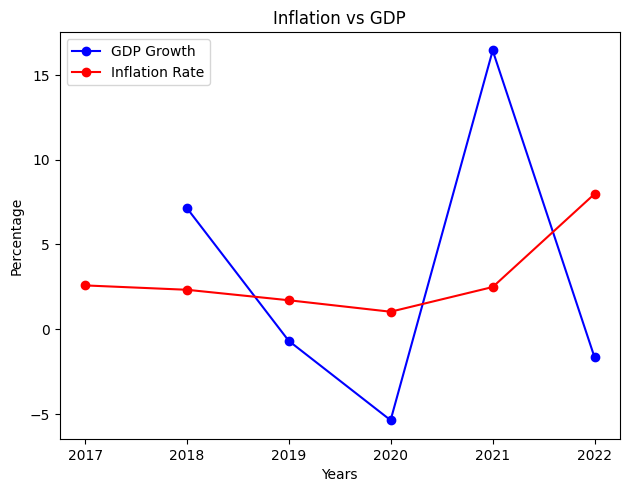

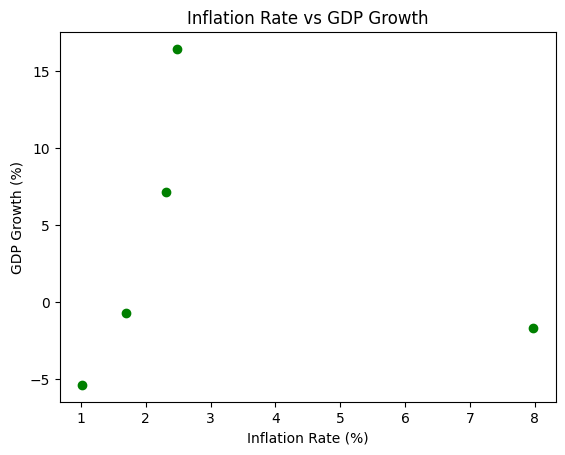

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the GDP Data file from: https://stats.oecd.org/index.aspx?queryid=60702# and the Inflation data from: https://stats.oecd.org/Index.aspx?DataSetCode=PRICES_CPI#

gdp_data = pd.read_csv('GDP_Data.csv')
inflation_data = pd.read_csv('inflation_data.csv')

# Filter the rows for the United Kingdom and the specific transaction and measure
uk_gdp_rows = gdp_data[(gdp_data['Country'] == 'United Kingdom') & 
                       (gdp_data['Transaction'] == 'Gross domestic product (income approach)') & 
                       (gdp_data['MEASURE'] == 'CXC')].copy()

# Convert 'Year' column to datetime type
uk_gdp_rows['Year'] = pd.to_datetime(uk_gdp_rows['Year'], format='%Y')

# Sort dataframe by 'Year' to ensure chronological order
uk_gdp_rows.sort_values(by='Year', inplace=True)

# Calculate percentage growth
uk_gdp_rows['GDP_Percentage_Growth'] = uk_gdp_rows['Value'].pct_change() * 100

# Inflation rates

target_years = ['2017', '2018', '2019', '2020', '2021', '2022']
yearly_inflation_percentages = inflation_data[(inflation_data['Country'] == 'United Kingdom') & 
                                              (inflation_data['Frequency'] == 'Annual') & 
                                              (inflation_data['MEASURE'] == 'GP') & 
                                              (inflation_data['SUBJECT'] == 'CPALTT01') & 
                                              (inflation_data['Time'].isin(target_years))]

yearly_inflation_percentages = yearly_inflation_percentages['Value']

# Plotting
fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
ax1.set_ylabel('Percentage')
ax1.plot(uk_gdp_rows['Year'], uk_gdp_rows['GDP_Percentage_Growth'], marker='o', linestyle='-', color='b', label='GDP Growth')
ax1.tick_params(axis='y')
ax1.plot(uk_gdp_rows['Year'], yearly_inflation_percentages, marker='o', linestyle='-', color='r', label='Inflation Rate')

fig.tight_layout()

plt.title('Inflation vs GDP')

plt.legend(loc='upper left')

# Plotting GDP Growth to Inflation Rate

fig2, ax2 = plt.subplots()
ax2.scatter(yearly_inflation_percentages, uk_gdp_rows['GDP_Percentage_Growth'], color='g')
ax2.set_xlabel('Inflation Rate (%)')
ax2.set_ylabel('GDP Growth (%)')
plt.title('Inflation Rate vs GDP Growth')

plt.show()

C:\Users\Theo\AppData\Local\Temp\ipykernel_90984\2834946640.py:6: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  inflation_data = pd.read_csv('Inflation_Data.csv')
C:\Users\Theo\AppData\Local\Temp\ipykernel_90984\2834946640.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_money_growth['TIME'] = pd.to_datetime(uk_money_growth['TIME'])
C:\Users\Theo\AppData\Local\Temp\ipykernel_90984\2834946640.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

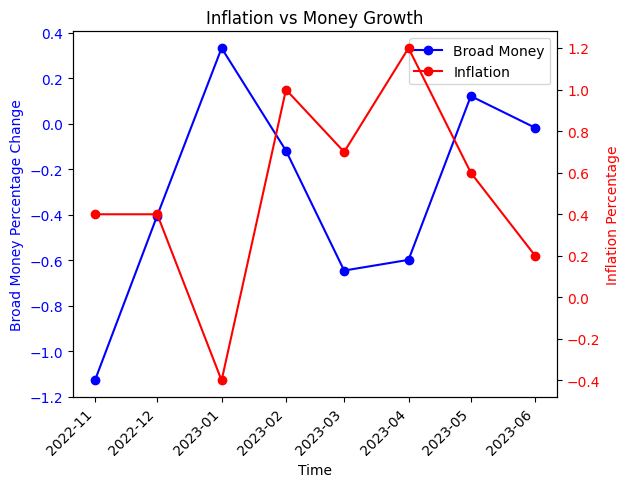

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
money_growth_data = pd.read_csv('Money_Growth_Data.csv')
inflation_data = pd.read_csv('Inflation_Data.csv')

# Filter the data for the United Kingdom and the required editions
uk_money_growth = money_growth_data[(money_growth_data['Country'] == 'United Kingdom') & 
                                    (money_growth_data['Edition'] == 'September 2023')]
uk_money_growth['TIME'] = pd.to_datetime(uk_money_growth['TIME'])
uk_money_growth['Money_percentage_growth'] = uk_money_growth['Value'].pct_change() * 100

# Filter the inflation data for the United Kingdom and the required months
target_months = ['Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023', 'Jun-2023']
uk_inflation = inflation_data[(inflation_data['Country'] == 'United Kingdom') & 
                              (inflation_data['Frequency'] == 'Monthly') & 
                              (inflation_data['MEASURE'] == 'GP') & 
                              (inflation_data['SUBJECT'] == 'CPALTT01') & 
                              (inflation_data['Time'].isin(target_months))]
uk_inflation['TIME'] = pd.to_datetime(uk_inflation['Time'])

# Plotting
fig, ax1 = plt.subplots()

# Plot money growth percentage change
ax1.set_xlabel('Time')
ax1.set_ylabel('Broad Money Percentage Change', color='b')
line1, = ax1.plot(uk_money_growth['TIME'], uk_money_growth['Money_percentage_growth'], marker='o', linestyle='-', color='b', label='Broad Money')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot inflation percentage
ax2 = ax1.twinx()
ax2.set_ylabel('Inflation Percentage', color='r')
line2, = ax2.plot(uk_inflation['TIME'], uk_inflation['Value'], marker='o', linestyle='-', color='r', label='Inflation')
ax2.tick_params(axis='y', labelcolor='r')

# Adjust the x-axis labels to avoid overlap
fig.autofmt_xdate(rotation=45)

# Add legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')

fig.tight_layout()
plt.title('Inflation vs Money Growth')
plt.show()


C:\Users\Theo\AppData\Local\Temp\ipykernel_90984\601288233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_cpi_rows['TIME'] = pd.to_datetime (uk_cpi_rows['TIME'])
C:\Users\Theo\AppData\Local\Temp\ipykernel_90984\601288233.py:12: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  inflation = pd.read_csv('Inflation_Data.csv')
C:\Users\Theo\AppData\Local\Temp\ipykernel_90984\601288233.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inflation['TIME'] = pd.to_datetime(inflation['TIME'])


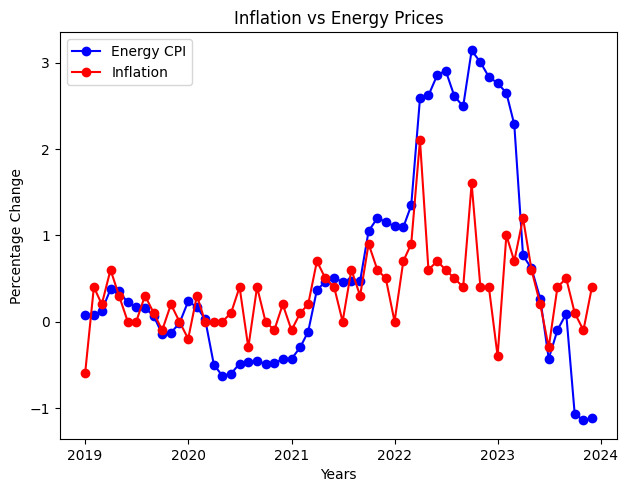

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Get Energy CPI data

cpi_data = pd.read_csv('CPI.csv') 
uk_cpi_rows = cpi_data[(cpi_data['Country'] == 'United Kingdom') & (cpi_data['Subject'] == 'CPI: Energy')]
uk_cpi_rows['TIME'] = pd.to_datetime (uk_cpi_rows['TIME'])

# Get Inflation CPI data

inflation = pd.read_csv('Inflation_Data.csv')
inflation['TIME'] = pd.to_datetime(inflation['TIME'])
time = pd.Timestamp ('Dec-2018')
time2 = pd.Timestamp ('Jan-2024')
subset = inflation[(inflation['TIME'] > time) &
(inflation['TIME'] < time2) & 
(inflation['Subject'] == 'CPI: 01-12 - All items') & 
(inflation['FREQUENCY'] == 'M') &
(inflation['MEASURE'] == 'GP') & 
(inflation['LOCATION'] == 'GBR')]

# Plot graphs

fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
ax1.set_ylabel('Percentage Change')
ax1.plot(uk_cpi_rows['TIME'], uk_cpi_rows['Value'], marker='o', linestyle='-', color='b', label='Energy CPI')
ax1.tick_params(axis='y')
ax1.plot(subset['TIME'], subset['Value'], marker='o', linestyle='-', color='r', label='Inflation')

fig.tight_layout()
ax1.legend(loc='upper left')
plt.title ('Inflation vs Energy Prices')
plt.show()